In [26]:
import numpy as np
import matplotlib.pyplot as plt
import Operators as op
import SensingMatrix as sm
import Measurements as me
from SetUpImage import setUpImage
from Displays import phase_retrie_plots
import imageio

In [27]:
half_Nx, half_Ny = 64, 64 #half image shape
Nx, Ny = 2 * half_Nx + 1,  2 * half_Ny + 1 #image shape
rx, ry = 1, 1 #for oversampling
n = Nx * Ny #image size

# object support
Kx = 1 * (half_Nx)// 2 # half_Nx #any natural integer between 0 (object is a single point) and half_Nx (object fills up the full image).  
Ky = 1 * (half_Ny)// 2 # half_Ny #any natural integer between 0 (object is a single point) and half_Nx (object fills up the full image).

# mask support
tx = 0.0 #parameter between 0 (very precise) and 1(no support knowledge) # 0.35  failed already
ty = 0.0 #parameter between 0 (very precise) and 1(no support knowledge)  

#true_images = setUpImage(Nx, Ny)
s = setUpImage(Nx, Ny, Kx, Ky, tx, ty)

true_images, mask = s()
#print(mask.shape)


In [28]:
#map.f(x_true) < 1e-5
len(true_images)
#plt.imshow(true_images[-1].real, cmap='gray') #, origin='lower' #true_images[3].imag #mask.real #np.maximum(true_images[].real, mask.real)
#plt.colorbar()
# Charger l'image et convertir en matrice numpy
# Conversion en niveaux de gris
image = true_images[0].real
matrix = np.array(image)
x = matrix

X = np.fft.fft2(x)
#y, z =  
#Y, Z = np.meshgrid()
P = np.fft.fftshift(np.angle(X))
#plt.imshow((X.imag))
#plt.colorbar()
#plt.imshow(np.fft.ifftshift(x))
#plt.imshow(np.angle(X))

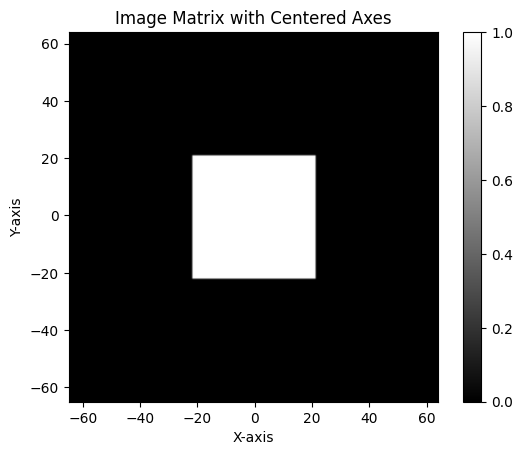

In [29]:
# Obtenir les dimensions de l'image
height, width = matrix.shape

# Créer la figure et les axes
fig, ax = plt.subplots()

# Afficher la matrice
cax = ax.imshow(matrix, extent=[-width//2, width//2, -height//2, height//2], cmap='gray')

# Ajouter une barre de couleurs pour référence
fig.colorbar(cax)

# Ajouter des labels aux axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.title('Image Matrix with Centered Axes')

plt.show()

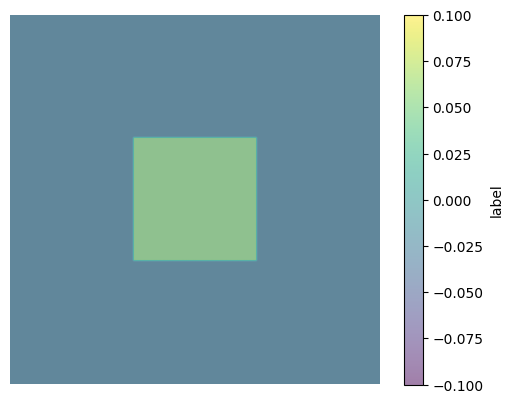

In [30]:
# Create a figure and axis
fig, ax = plt.subplots()

# Display the first image
ax.imshow(mask.real, alpha=0.5)

# Overlay the second image
im = true_images[0].imag
img = ax.imshow((im), alpha=.5) # np.fft.ifftshift
plt.colorbar(img, ax=ax, label='label')
# Remove axis
ax.axis('off')
#plt.colorbar(im, ax = ax)
# Show the result
plt.show()

In [31]:
x_true = true_images[1]
x_true_vect = x_true.reshape(Nx * Ny, )
X = [x_true_vect,  x_true_vect]
# X_true_vect = ((1. + 0.j)*np.random.normal(0.5, 0.25, size = (n, ) )) +  (0. + 1.j)*np.random.normal(0.5, 0.25, size = (n, ) )
#print("x_true_vect", x_true_vect)
#x = (1 + 2j)*np.ones(x_true_vect.shape)

#noise_lvl = 0.e-4
A = sm.FourierMatrix(Nx, Ny, rx, ry) #sm.FourierMatrix(Nx, Ny, rx, ry) #sm.iid_stdd_Gauss(Nx, Ny, rx, ry)
#B =  list(map(lambda x: A(x), X)) #list(map(A, X))
#A(x_true_vect)
# from scipy import ndimage
# from scipy.signal import convolve2d
# from numpy.fft import fftn, ifftn, fftshift, ifftshift
'''
    MASK = ((A.Matrix) @ np.conjugate(mask.flatten())).reshape(mask.shape)

    x_trueM = (np.conjugate(A.Matrix.T) @ (X_true_vect)).reshape(mask.shape)
    x_true = (ifftn(X_true_vect.reshape(mask.shape), s = (Nx,Ny), norm = 'ortho'))

    invFourMaskM = (np.conjugate(A.Matrix.T) @ (mask.flatten())).reshape(mask.shape)
    invFourMask = (ifftn(mask, s = (Nx,Ny), norm = 'ortho'))

    convM = (convolve2d(x_trueM, invFourMaskM, mode='same', boundary='wrap')).flatten() #reshape(Nx * Ny, ) #flatten()#
    conv = (convolve2d(x_true, invFourMask, mode='same', boundary='wrap')).flatten() #reshape(Nx * Ny, ) #flatten()#

    Four_convM = (A.Matrix @ (convM)).reshape(mask.shape) ########### THIS IS THE RIGHT MULTIPLICATION ########### (fftn(conv.reshape(mask.shape), s = (Nx,Ny), norm = 'ortho')).reshape(mask.shape) #
    Four_conv = (fftn(conv.reshape(mask.shape), s = (Nx,Ny), norm = 'ortho'))#.reshape(mask.shape)

    print()
    plt.imshow(( Four_convM - Four_conv).imag, cmap='gray') #X_true_vect.reshape(mask.shape) #conv.reshape(mask.shape) #, origin='lower' #(fftn(invFourMask.reshape(mask.shape), s = (Nx,Ny), norm = 'ortho') )
    plt.colorbar()
    
    #print(np.linalg.norm(A.Matrix @ np.conj(A.Matrix).T - np.conj(A.Matrix).T @ A.Matrix))
    #print("A.Matrix", A.Matrix)
    #meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    #map = op.operators(algo = 'complex mirror', meas = meas, A = A)
    #map.f( x)
    #print(map.psi(2 * x), map.psi(1 * x), map.breg_psi(2 * x, x))
 '''

'\n    MASK = ((A.Matrix) @ np.conjugate(mask.flatten())).reshape(mask.shape)\n\n    x_trueM = (np.conjugate(A.Matrix.T) @ (X_true_vect)).reshape(mask.shape)\n    x_true = (ifftn(X_true_vect.reshape(mask.shape), s = (Nx,Ny), norm = \'ortho\'))\n\n    invFourMaskM = (np.conjugate(A.Matrix.T) @ (mask.flatten())).reshape(mask.shape)\n    invFourMask = (ifftn(mask, s = (Nx,Ny), norm = \'ortho\'))\n\n    convM = (convolve2d(x_trueM, invFourMaskM, mode=\'same\', boundary=\'wrap\')).flatten() #reshape(Nx * Ny, ) #flatten()#\n    conv = (convolve2d(x_true, invFourMask, mode=\'same\', boundary=\'wrap\')).flatten() #reshape(Nx * Ny, ) #flatten()#\n\n    Four_convM = (A.Matrix @ (convM)).reshape(mask.shape) ########### THIS IS THE RIGHT MULTIPLICATION ########### (fftn(conv.reshape(mask.shape), s = (Nx,Ny), norm = \'ortho\')).reshape(mask.shape) #\n    Four_conv = (fftn(conv.reshape(mask.shape), s = (Nx,Ny), norm = \'ortho\'))#.reshape(mask.shape)\n\n    print()\n    plt.imshow(( Four_convM - Fou

In [32]:
############### attempt to make mirror descent faster: use fft to compute gradients. what is the right formula? ############
'''
    noise_lvl = 0.e-1
    meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    map = op.operators(algo = 'real mirror', meas = meas, A = A, mask = mask)
    x = 4*(((1. + 0.j)*np.random.normal(0.5, 0.25, size = (n, ) )) +  (0. + 1.j)*np.random.normal(0.5, 0.25, size = (n, ) ))

    grad_f_x = np.asarray(map.grad_f(x))
    def grad_fFast(x): #Wirtinger derivative, fast matrix form #theirs _new
        z =  (fftn(np.conj(x.reshape(mask.shape)), s = mask.shape, norm = 'ortho')).flatten() #self.A(x) #(A.Matrix) @ np.conjugate(x) ########## Done
        y = np.conjugate(A.Matrix) @ x
        a =  ( A.Matrix).T @ ( y*( z * np.conjugate(z) - meas)) #(ifftn(((y*( z * np.conjugate(z) - meas)).reshape(mask.shape)), s = mask.shape, norm = 'ortho')).flatten() ####### Not yet done
        m = len(meas) 
        return a / (1*m)
    grad_fFast_x =grad_fFast(x)
    np.linalg.norm(grad_f_x - grad_fFast_x)
'''

"\n    noise_lvl = 0.e-1\n    meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()\n    map = op.operators(algo = 'real mirror', meas = meas, A = A, mask = mask)\n    x = 4*(((1. + 0.j)*np.random.normal(0.5, 0.25, size = (n, ) )) +  (0. + 1.j)*np.random.normal(0.5, 0.25, size = (n, ) ))\n\n    grad_f_x = np.asarray(map.grad_f(x))\n    def grad_fFast(x): #Wirtinger derivative, fast matrix form #theirs _new\n        z =  (fftn(np.conj(x.reshape(mask.shape)), s = mask.shape, norm = 'ortho')).flatten() #self.A(x) #(A.Matrix) @ np.conjugate(x) ########## Done\n        y = np.conjugate(A.Matrix) @ x\n        a =  ( A.Matrix).T @ ( y*( z * np.conjugate(z) - meas)) #(ifftn(((y*( z * np.conjugate(z) - meas)).reshape(mask.shape)), s = mask.shape, norm = 'ortho')).flatten() ####### Not yet done\n        m = len(meas) \n        return a / (1*m)\n    grad_fFast_x =grad_fFast(x)\n    np.linalg.norm(grad_f_x - grad_fFast_x)\n"

In [8]:
(Qx, Qy) = int(rx * Nx), int(ry * Ny)
m = Qx * Qy
X = 4*(((1. + 0.j)*np.random.normal(0.5, 0.25, size = (m, ) )) +  (0. + 1.j)*np.random.normal(0.5, 0.25, size = (m, ) ))
A.p_inv(X)

array([  1.29872842e+02+131.45727457j,   1.12569331e-01  -1.28603901j,
        -4.50312992e-02  +0.80424173j, ...,
         2.25885243e-01  -1.85647558j,  -5.43173944e-01  +0.42222636j,
         1.81149735e-02  +1.13212906j])

In [9]:

#A_pinv = np.linalg.pinv(A.Matrix) # A is full rank and unital. So use A_pinv = A* to be faster

In [10]:
# x_true = (ifftn(X_true_vect.reshape(mask.shape), s = (Nx,Ny), norm = 'ortho')).flatten()
# x = A_pinv @ X_true_vect
# np.linalg.norm(x_true - x)

In [11]:
import odl
print(odl.__version__)

0.7.0


In [33]:
import solve

In [13]:
# X = A.Matrix @ np.conjugate(x_true_vect)
# B = np.conj(A.Matrix)
# Xa = A.Matrix @ ((A_pinv) @ X)
# I = A.Matrix @ A_pinv
#print('A', A.Matrix)
#print('A_pinv', A_pinv)
#print('A.T', A.Matrix.T)
#print(np.linalg.norm(X - Xa))

In [14]:
#FMPE0, FMPE1, FMPE2 = [], [], []

iteration k 0
iteration k 100
iteration k 200
iteration k 300
iteration k 400
iteration k 0
iteration k 100
iteration k 200
iteration k 300
iteration k 400
iteration k 0
iteration k 100
iteration k 200
iteration k 300
iteration k 400


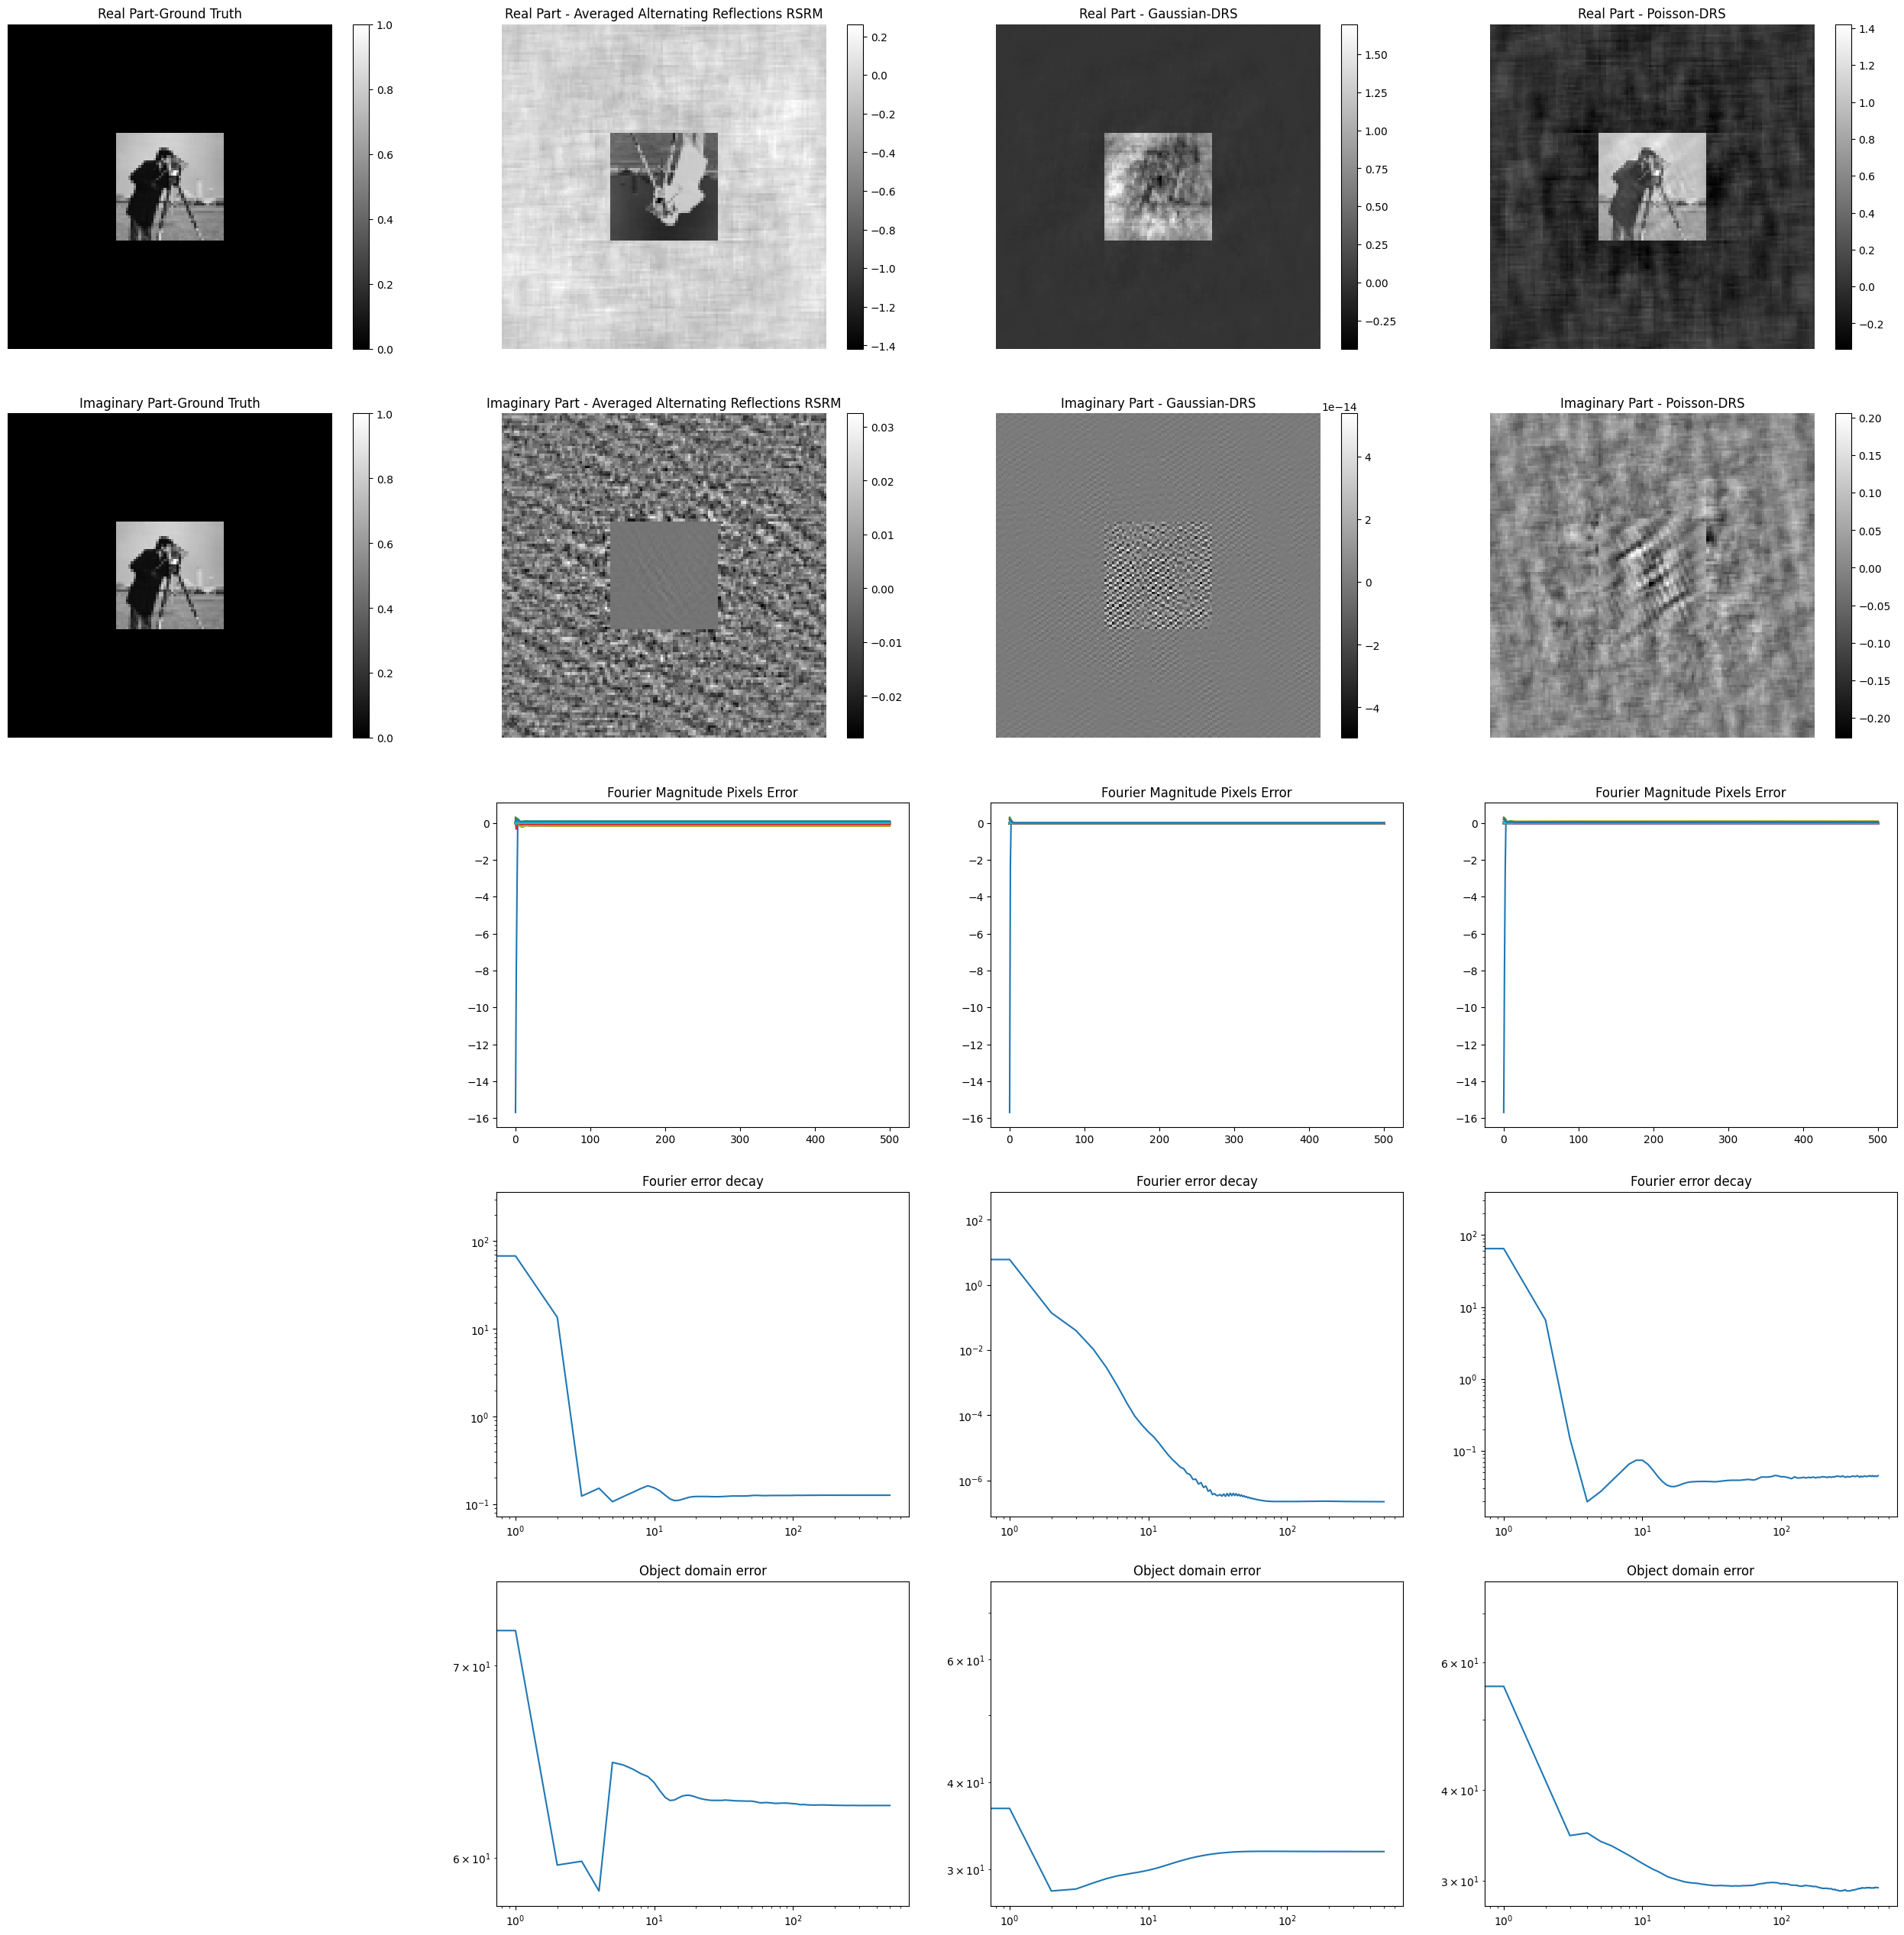

In [37]:
idx = [6]# 1, 6, 7 np.arange(len(true_images)) #[0, 1] # np.arange(1) 
Algos_group = []
Algos = ['real mirror', 'complex mirror', 'Hybrid Input-Output']
#Algos_group.append(Algos)
Algos = ['No Support prior - fast', 'Gerchberg-Saxton', 'Error Reduction : support prior'] # 'Output-Output'   'Error Reduction + TV-support' 'Gerchberg-Saxton' 'basic Input-Output'
#Algos_group.append(Algos)
Algos = [ 'Error Reduction : support prior', 'Error Reduction + TV-support', 'Hybrid Input-Output'] # 'Output-Output' $\beta = 0$ gives 'No support prior' Algo
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'new Hybrid Input-Output', 'Averaged Alternating Reflections RSRM' ] #,  'Hybrid Input-Output + TV'
#Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RSRM', 'Gaussian-DRS', 'Poisson-DRS'  ] #ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RSRM + TV', 'Gaussian-DRS + TV1', 'Poisson-DRS + TV1'  ] #ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'Hybrid Input-Output real'  ]  #,  'Averaged Alternating Reflections RSRM', 'Gaussian-DRS' 'Peaceman-Rachford'                            #, 'Gerchberg-Saxton + TV-support', 'Error Reduction + TV-support'                      #TV-support alsmost kills the real part and make Gerchberg-Saxton worse
#Algos_group.append(Algos)                 #'No Support prior + TV-support real_imag_separated' 'No Support prior + TV-support',
Algos = ['Poisson-DRS',  'Averaged Alternating Reflections RSRM', 'Averaged Alternating Reflections RMRS' ] #RSRM and RMRS produce similar images but error looks very different
#Algos_group.append(Algos)
Algos = ['Poisson-DRS', 'Poisson-DRS + TV', 'Gaussian-DRS'  ] # , 'Hybrid Input-Output' 'No Support prior', 'Gerchberg-Saxton', 'Error Reduction', 'real mirror', 'complex mirror', 
#Algos_group.append(Algos)
Algos = ['Gaussian-DRS', 'Gaussian-DRS + TV', 'Gaussian-DRS + TV1'  ] # , 'Hybrid Input-Output' 'No Support prior', 'Gerchberg-Saxton', 'Error Reduction', 'real mirror', 'complex mirror', 
#Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RSRM',   'Gaussian-DRS', 'Poisson-DRS'] #'Poisson-DRS + TV','Averaged Alternating Reflections RSRM', 'Gaussian-DRS',  'Poisson-DRS' #'Averaged Alternating Reflections', 'real mirror' , 'complex mirror'  'Poisson-DRS' 'Poisson-DRS' 'Error Reduction : support prior'
#Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RSRM', 'RAAR',  'Gaussian-DRS'] #'Poisson-DRS + TV','Averaged Alternating Reflections RSRM', 'Gaussian-DRS',  'Poisson-DRS' #'Averaged Alternating Reflections', 'real mirror' , 'complex mirror'  'Poisson-DRS' 'Poisson-DRS' 'Error Reduction : support prior'
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'Averaged Alternating Reflections RSRM', 'Averaged Alternating Reflections RMRS' ] #'Poisson-DRS + TV','Averaged Alternating Reflections RSRM', 'Gaussian-DRS',  'Poisson-DRS' #'Averaged Alternating Reflections', 'real mirror' , 'complex mirror'  'Poisson-DRS' 'Poisson-DRS' 'Error Reduction : support prior'
#Algos_group.append(Algos)
for Algos in Algos_group:
    for i in idx:
        X_sols = []
        x_true = true_images[i]
        x_true_vect = x_true.reshape(Nx * Ny, )
        maxiter = 500
        kappa  = 100000
        xi = 12
        noise_lvl = 0.
        noise_lvl_init = 0.4 #amplitude noise #If not 0, iterative projections algo: ER, HIO, even AAR stagnate at local minima. error is 1e-7 instead of 1e-37 for instance
        meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl**(1) , A)()  #me.gauss_noisy_meas #poiss_noisy_meas
        meas = meas.flatten()
        L = 1 * op.smoothnessPara_L(A.Matrix, noise)
        #print("meas", meas)
        init = 'Gaussian'
        x0 = op.initialise(n, meas, A.Matrix, type = init, real = 1, imag = 0, x_true_vect = x_true_vect, mask = mask, noise_lvl = noise_lvl_init**(0.5) ) 
        for Algo in Algos:
            map = op.operators(algo = Algo, meas = meas, A = A, mask = mask) 
            #print('grad', np.asarray(map.grad_f(1 + x_true_vect)))
            x_sols, space = solve.phase_retrieval(L, kappa, xi, Algo, map, mask, n, A,  A.Matrix, A.p_inv, meas, maxiter, x0, 
                                                  x_true_vect, IO_OO_HIO_newHIO_beta = [1, .6, 1., [.25, .25, .5]], RAAR_AAR_beta = [1., .5], TvIter = 10, TvAlpha = 0.005, rho_Gau_Poi = [[1, 0.5], [0., 0.5]] ) #Gaussion rho = .5 outperforms AAR
                                                                                    
                                                                                                                #np.conj(A.Matrix).T #TvAlpha = 0.045 # poisson TvAlpha =0.02 #  Don't regularise Fourier
            #print(x_sols)
            X_sols.append(x_sols)
        phase_retrie_plots(i, true_images, X_sols, map, A, meas, maxiter, space, Algos ) #FMPE0, FMPE1, FMPE2 =

iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0


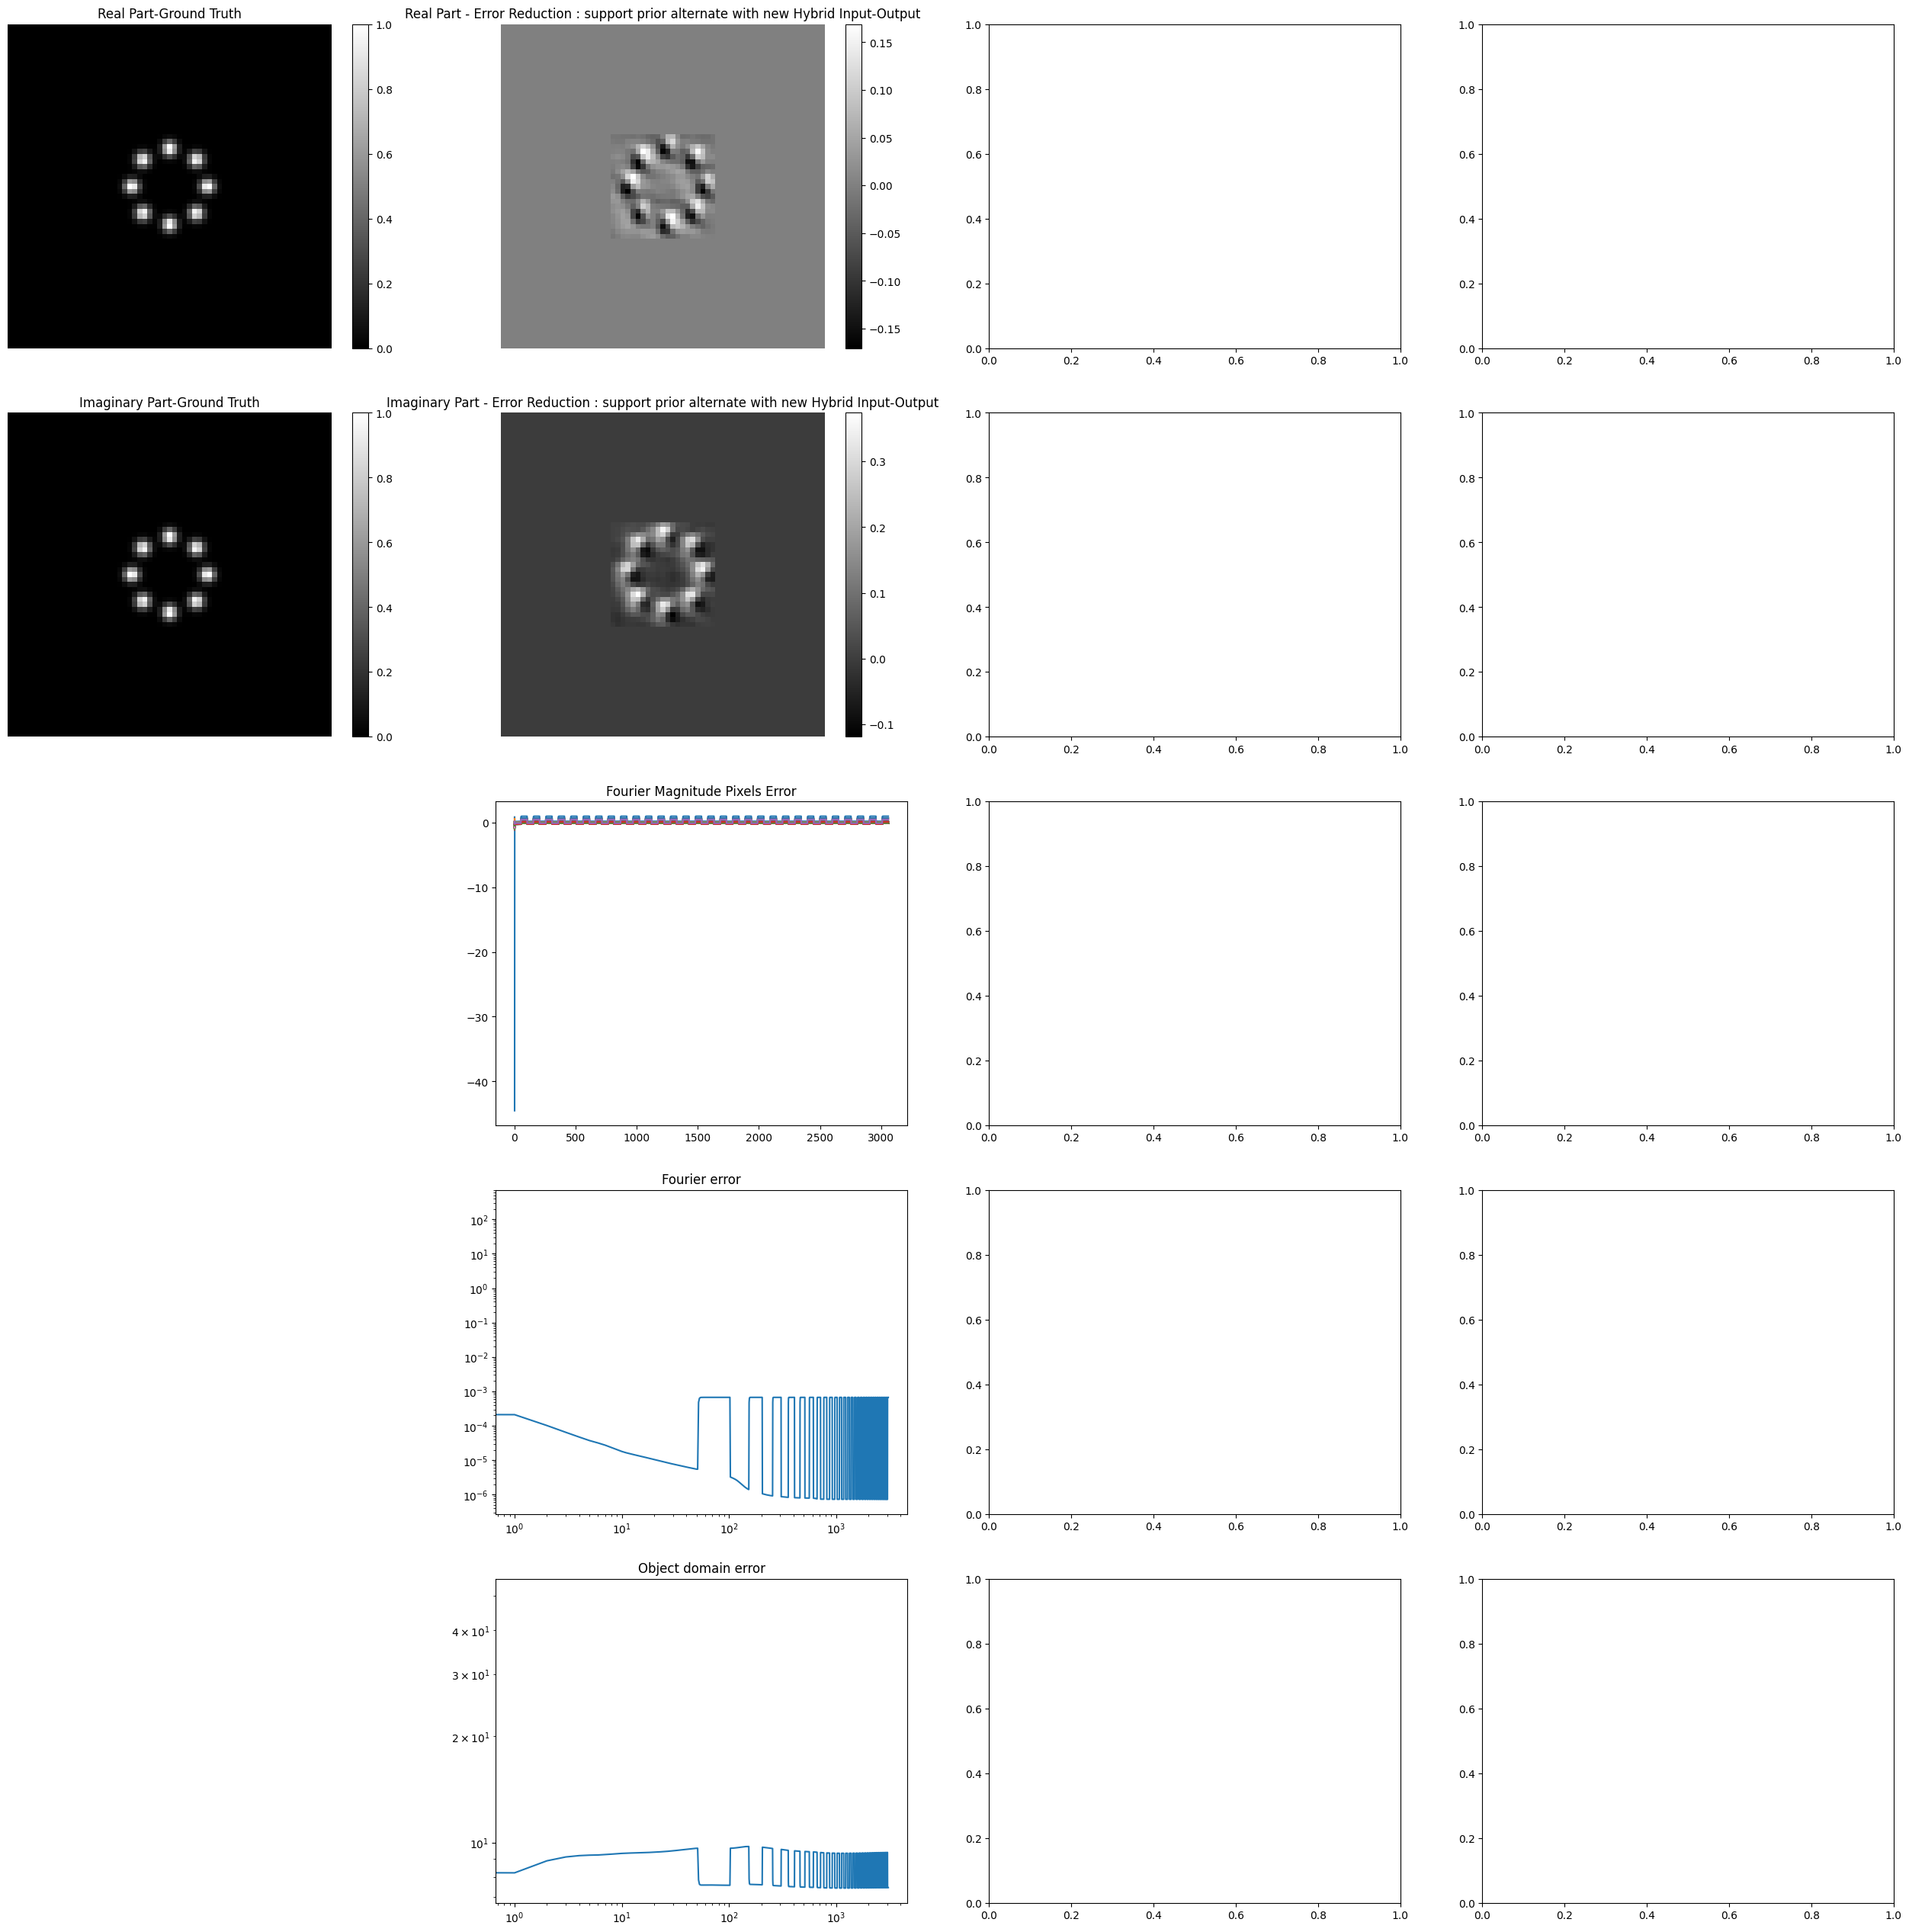

In [21]:
from DisplayAlternate import phase_retrie_plots_alternate
idx = [1]#1, 6, 7 np.arange(len(true_images)) #[0, 1] # np.arange(1) 
Algos = [  'Error Reduction : support prior',  'new Hybrid Input-Output'] #'Hybrid Input-Output' 'Error Reduction : support prior'
for i in idx:
    X_sols = []
    x_true = true_images[i]
    x_true_vect = x_true.reshape(Nx * Ny, )
    maxiter = 50
    kappa  = 0.9
    xi = 12
    noise_lvl = 0.
    noise_lvl_init = 0.
    meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    meas = meas.flatten()
    L = 1 * op.smoothnessPara_L(A.Matrix, noise)
    #print("meas", meas)
    #Sols_list = []
    x0 = op.initialise(n, meas, A.Matrix, type ='Gaussian', real = 1, imag = 1, x_true_vect = x_true_vect, mask = mask, noise_lvl = noise_lvl_init**(0.5) )
    for epoch in range(30):

        for Algo in Algos:
            map = op.operators(algo = Algo, meas = meas, A = A, mask = mask) 
            x_sols, space = solve.phase_retrieval(L, kappa, xi, Algo, map, mask, n, A, A.Matrix, A.p_inv, meas, maxiter, x0, 
                                                  x_true_vect, IO_OO_HIO_newHIO_beta = [1, .6, 1., [.25, .25, .5]], RAAR_AAR_beta = [1., .5], TvIter = 10, TvAlpha = 0.005, rho_Gau_Poi = [[1, 0.5], [0, .1]] ) #Gaussion rho = .5 outperforms AAR
                                                 
            x0 = x_sols[-1]
            X_sols.extend(x_sols)
    x_sols, space = solve.phase_retrieval(L, kappa, xi, 'Error Reduction : support prior', map, mask, n, A, A.Matrix, A.p_inv, meas, maxiter, x0, 
                                          x_true_vect, IO_OO_HIO_newHIO_beta = [1, .6, 1., [.25, .25, .5]], RAAR_AAR_beta = [1., .5], TvIter = 0, TvAlpha = 0.000, rho_Gau_Poi = [[0., .5], [0, .1]] )  
    #X_sols.append(Sols_list)
    phase_retrie_plots_alternate(i, true_images, X_sols, map, A, meas, maxiter, space, Algos)